In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df=pd.read_csv('diabetes.csv')

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()/len(df)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


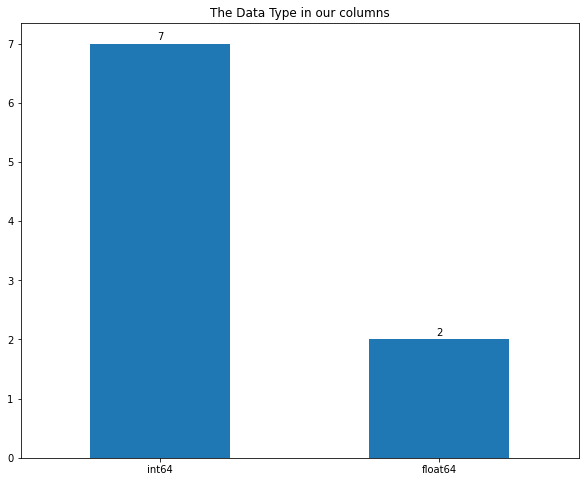

In [8]:
ax=df.dtypes.value_counts().plot.bar(figsize=(10,8))
plt.title('The Data Type in our columns')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container,label_type='edge',padding=2)
    

In [9]:
df.describe().style.background_gradient(cmap='autumn')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


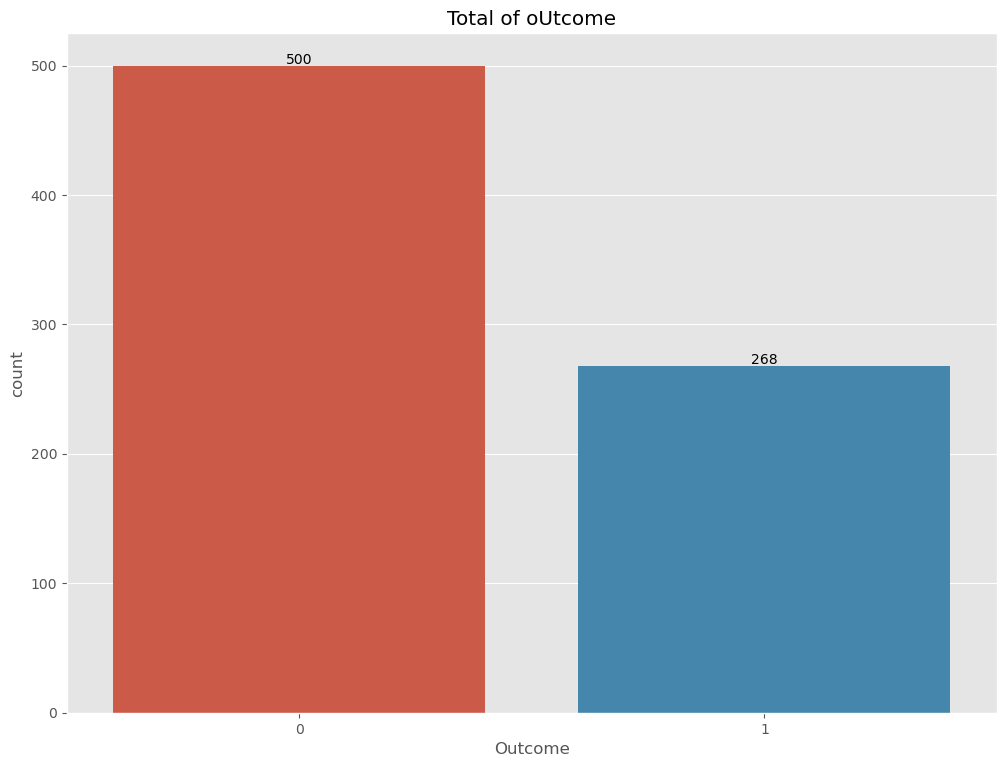

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(12,9),dpi=100)
ax=sns.countplot(data=df,x='Outcome')
plt.title('Total of oUtcome')
for container in ax.containers:
    ax.bar_label(container,label_type='edge',padding=-1);

In [12]:
dff=df.set_index('Outcome')

In [13]:
dff

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
1,6,148,72,35,0,33.6,0.627,50
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
0,1,89,66,23,94,28.1,0.167,21
1,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
0,10,101,76,48,180,32.9,0.171,63
0,2,122,70,27,0,36.8,0.340,27
0,5,121,72,23,112,26.2,0.245,30


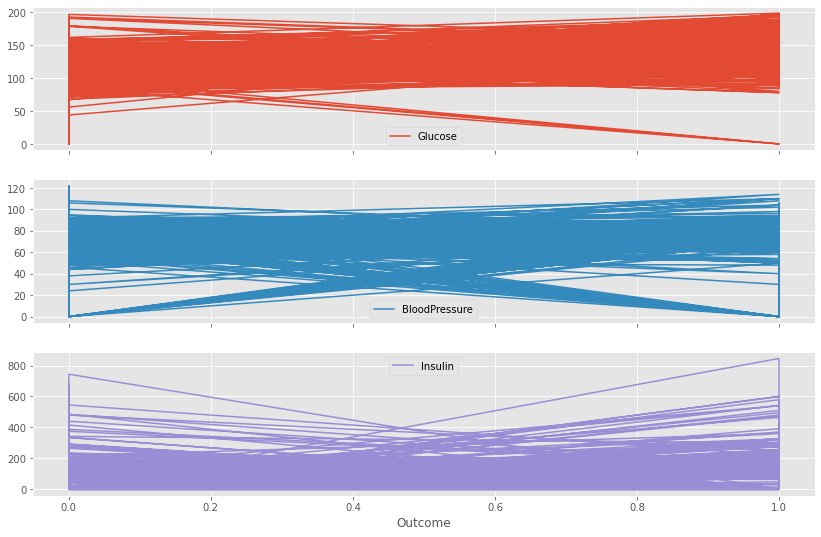

In [18]:

subplots=dff[['Glucose','BloodPressure','Insulin']].plot.line(figsize=(14,9),subplots=True)

Text(0.5, 1.0, 'The Age distribution')

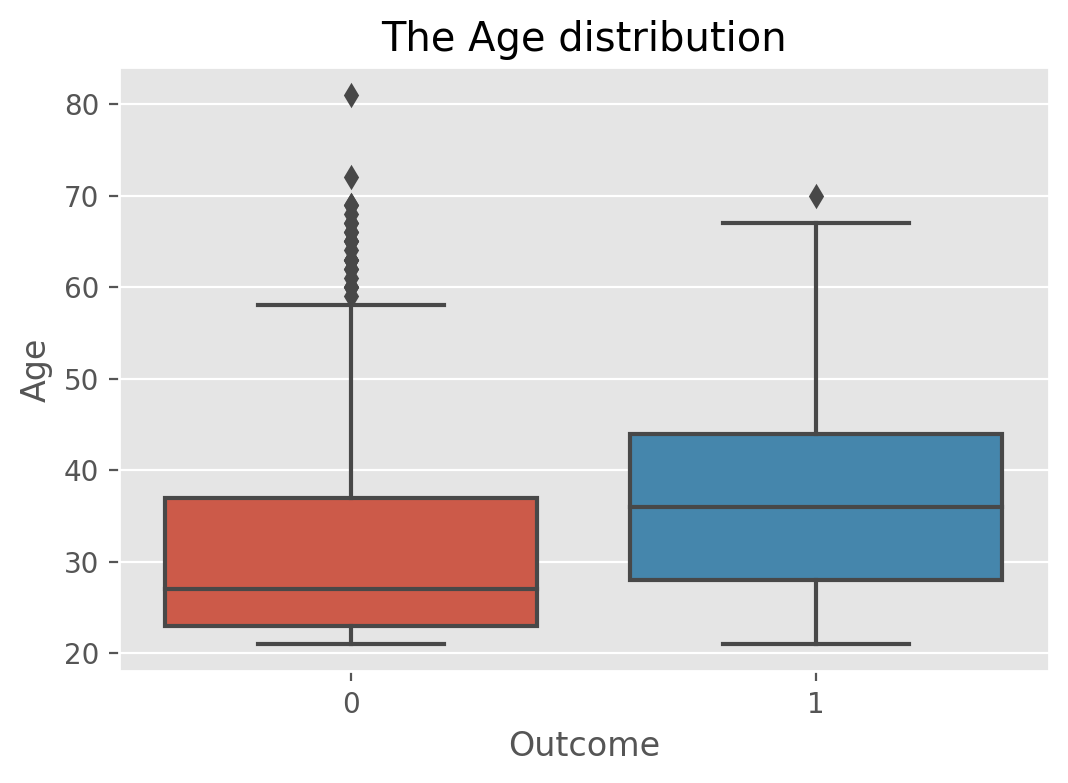

In [22]:
plt.figure(dpi=200)
sns.boxplot(data=df,x='Outcome',y='Age')
plt.title('The Age distribution')

Text(0.5, 1.0, 'The Insulin Distribution')

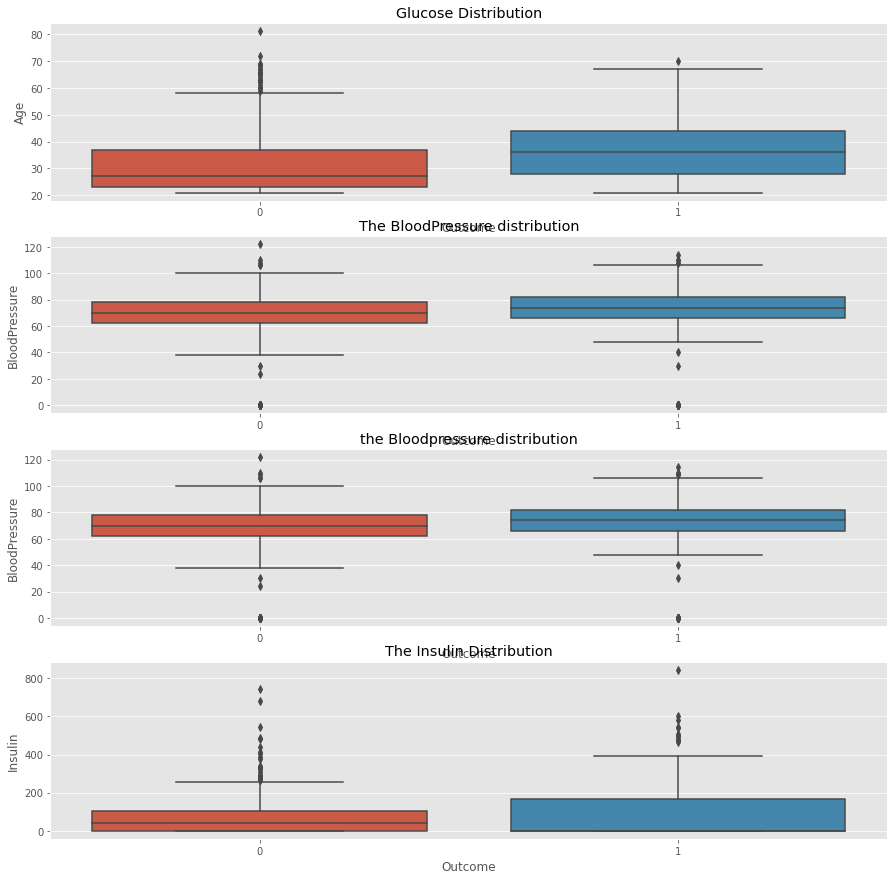

In [26]:
fig,ax=plt.subplots(4,1, figsize=(15,15))
sns.boxplot(data=df,x='Outcome',y='Age',ax=ax[0])
ax[0].set_title('Glucose Distribution')
sns.boxplot(data=df,x='Outcome',y='BloodPressure',ax=ax[1])
ax[1].set_title('The BloodPressure distribution')
sns.boxplot(data=df,x='Outcome',y='BloodPressure',ax=ax[2])
ax[2].set_title('the Bloodpressure distribution')
sns.boxplot(data=df,x='Outcome',y='Insulin',ax=ax[3])
ax[3].set_title('The Insulin Distribution')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop('Outcome',axis=1)

y=df['Outcome']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
scalerXtrain=scaler.fit_transform(X_train)

In [34]:
scalerXtest=scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegressionCV

In [36]:
model=LogisticRegressionCV()

In [37]:
model.fit(scalerXtrain,y_train)

LogisticRegressionCV()

In [41]:
model.coef_

array([[ 0.38686773,  1.07480175, -0.24771724, -0.03109447, -0.08655774,
         0.66842502,  0.33689316,  0.231509  ]])

In [42]:
model.intercept_

array([-0.85886821])

In [44]:
new=pd.Series(data=model.coef_[0],index=X.columns)

In [47]:
model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [48]:
model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

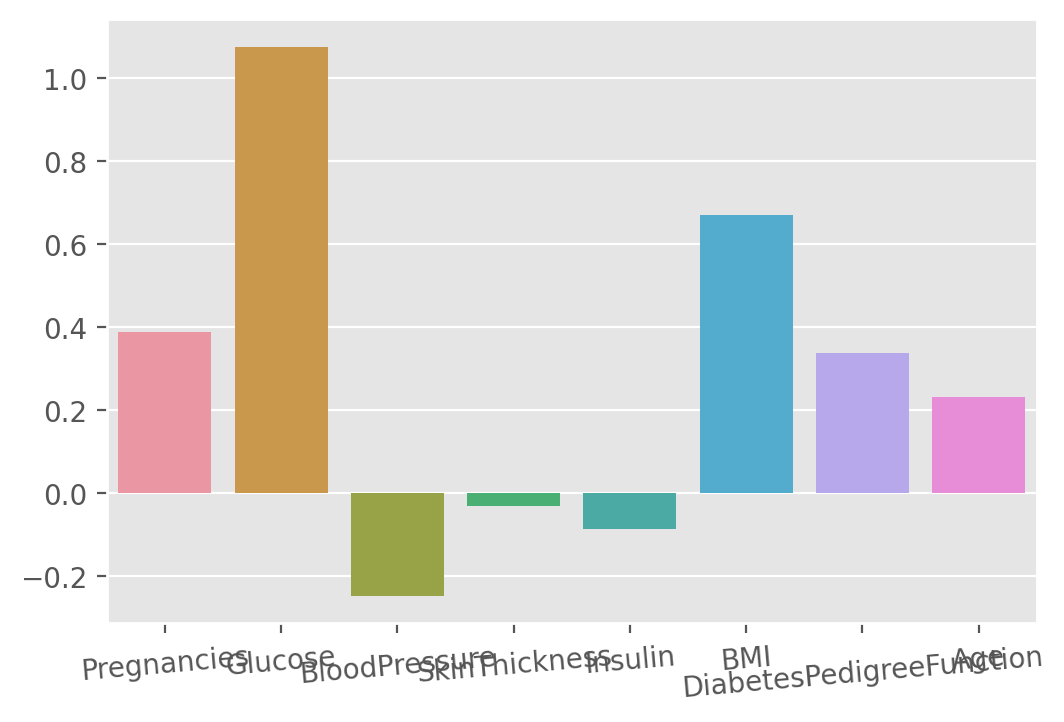

In [52]:
plt.figure(dpi=200)
new.sort_values(ascending=True)
sns.barplot(x=new.index,y=new.values)
plt.xticks(rotation=5);

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,classification_report

In [56]:
test_prediction=model.predict(scalerXtest)

In [58]:
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       150
           1       0.74      0.60      0.67        81

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231



In [59]:
accuracy_score(y_test,test_prediction)

0.7878787878787878

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [62]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [63]:
test_pred=KNN.predict(X_test)

In [64]:
accuracy_score(y_test,test_pred)

0.7445887445887446

In [65]:
from sklearn.svm import SVC

In [66]:
svm=SVC( C=0.005,kernel='rbf')

In [67]:
svm.fit(X_train,y_train)

SVC(C=0.005)

In [71]:
y_pred=svm.predict(X_test)

In [72]:
accuracy_score(y_test,y_pred)

0.6493506493506493

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


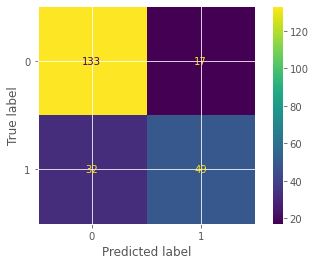

In [73]:
plot_confusion_matrix(model,scalerXtest,y_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


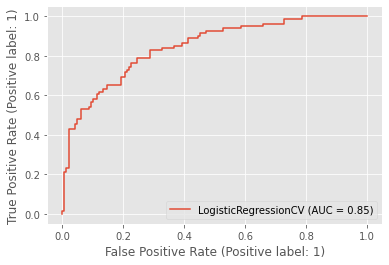

In [74]:
plot_roc_curve(model,scalerXtest,y_test)